In [1]:
# Importing modules
import pandas as pd
import numpy as np
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
nltk.download('stopwords')
nltk.download("punkt")
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Saman
[nltk_data]     Aziz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Retreive Dataset, save into df variable
df=pd.read_csv('dataset/fake_job_postings.csv')

In [4]:
# Data exploration
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
# How many rows and column in dataset
df.shape

(17880, 18)

In [5]:
# How many null values in respective columns
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [12]:
# Check column type (We use column which contains only string for training purpose)
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [17]:
# Drop useless columns
df=df.drop(['job_id','salary_range','telecommuting','has_company_logo','has_questions'],axis=1)


KeyError: "['job_id' 'salary_range' 'telecommuting' 'has_company_logo'\n 'has_questions'] not found in axis"

In [18]:
df.shape

(17880, 13)

In [19]:
df.isnull().sum()

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [23]:
df=df.drop(['department'],axis=1)
df.isnull().sum()

title                     0
location                346
company_profile        3308
description               1
requirements           2695
benefits               7210
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [25]:
df.fillna('',inplace=True)

In [26]:
df.head()

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [28]:
# Split dataset into features and label: X contains features Y contain target column
X = df.drop(['fraudulent'], axis=1)
Y=df['fraudulent']


In [29]:
X.head()

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [30]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64

<AxesSubplot:ylabel='fraudulent'>

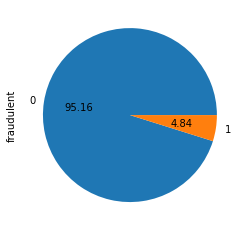

In [31]:
# Check for imbalance dataset
Y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# Merge all columns into text column from X

In [38]:
for col in X:
    df['text']=df['text']+' '+df[col]

In [40]:
for col in X:
    if not col == 'text':
        del df[col]

In [43]:
# Final Shape of Dataset 
df.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food5..."
1,0,"Customer Service - Cloud Video Production NZ,..."
2,0,"Commissioning Machinery Assistant (CMA) US, I..."
3,0,"Account Executive - Washington DC US, DC, Was..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSo..."


In [ ]:
# Data preprocessing (Text preprocessing)
#  1-Stop-Words Removal
#  2-Punctuation Removal
#  3-Numerical Removal
#  4-Stemming
#  5-Case Normalization

In [44]:
ps = PorterStemmer()

In [45]:


def tokenize(text):  # convert text into tokens
    return word_tokenize(text.lower())
english_stopwords = stopwords.words('english')

def clean_text(text): # expecting tokenize sentence
    filterText=''
    for token in text:
        if token not in english_stopwords and token.isalnum() and not token.isnumeric():
                filterText+=ps.stem(token)+' '
        
    return filterText   




In [46]:
count=0
for text in df['text']:
    df.loc[count,['text']] = [clean_text(tokenize(text))]
    count=count+1

In [47]:
df.head()

,fraudulent,text
0,0,market intern us ny new york food52 creat grou...
1,0,custom servic cloud video product nz auckland ...
2,0,commiss machineri assist cma us ia wever valor...
3,0,account execut washington dc us dc washington ...
4,0,bill review manag us fl fort worth spotsourc s...


# Text preprocessed. COMPLETE

Feature Extraction TF-IDF

In [48]:
tfidf = TfidfVectorizer(max_features=100)

In [49]:
result = tfidf.fit_transform(df['text'])

In [50]:
df1=pd.DataFrame(result.toarray(),columns=tfidf.get_feature_names_out())

In [51]:
df.drop(['text'],axis=1,inplace=True)
main_df=pd.concat([df1,df],axis=1)

In [52]:
main_df.head()

,abil,account,also,amp,applic,bachelor,base,benefit,best,build,...,us,use,want,web,well,within,work,world,year,fraudulent
0,0.000000,0.000000,0.113350,0.097279,0.0000,0.000000,0.000000,0.000000,0.116839,0.000000,...,0.066296,0.100153,0.0,0.000000,0.000000,0.000000,0.251578,0.000000,0.000000,0
1,0.031599,0.042284,0.034281,0.058841,0.0310,0.000000,0.062724,0.000000,0.000000,0.000000,...,0.020051,0.030290,0.0,0.038805,0.000000,0.000000,0.171195,0.370110,0.000000,0
2,0.000000,0.000000,0.000000,0.106766,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072762,0.000000,0.0,0.000000,0.000000,0.000000,0.138057,0.000000,0.000000,0
3,0.038131,0.561270,0.000000,0.000000,0.0000,0.079755,0.000000,0.088235,0.000000,0.116825,...,0.024195,0.000000,0.0,0.000000,0.000000,0.090783,0.068861,0.178646,0.058583,0
4,0.000000,0.107076,0.000000,0.074502,0.0785,0.167367,0.000000,0.092582,0.178964,0.000000,...,0.050774,0.000000,0.0,0.000000,0.085693,0.000000,0.144505,0.000000,0.061469,0


In [66]:
Y=main_df.iloc[:,-1]
X=main_df.drop(['fraudulent'],axis=1)

In [67]:
X.head()

,abil,account,also,amp,applic,bachelor,base,benefit,best,build,...,understand,us,use,want,web,well,within,work,world,year
0,0.000000,0.000000,0.113350,0.097279,0.0000,0.000000,0.000000,0.000000,0.116839,0.000000,...,0.000000,0.066296,0.100153,0.0,0.000000,0.000000,0.000000,0.251578,0.000000,0.000000
1,0.031599,0.042284,0.034281,0.058841,0.0310,0.000000,0.062724,0.000000,0.000000,0.000000,...,0.067703,0.020051,0.030290,0.0,0.038805,0.000000,0.000000,0.171195,0.370110,0.000000
2,0.000000,0.000000,0.000000,0.106766,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.072762,0.000000,0.0,0.000000,0.000000,0.000000,0.138057,0.000000,0.000000
3,0.038131,0.561270,0.000000,0.000000,0.0000,0.079755,0.000000,0.088235,0.000000,0.116825,...,0.163394,0.024195,0.000000,0.0,0.000000,0.000000,0.090783,0.068861,0.178646,0.058583
4,0.000000,0.107076,0.000000,0.074502,0.0785,0.167367,0.000000,0.092582,0.178964,0.000000,...,0.171443,0.050774,0.000000,0.0,0.000000,0.085693,0.000000,0.144505,0.000000,0.061469


In [70]:
clf = RandomForestClassifier(n_estimators=300,max_depth=300, random_state=5)
model=clf.fit(x_train, y_train)

In [76]:
# Dump RFC model into file using picke
pickle.dump(model, open('model.pkl', 'wb'))

In [77]:
pred=model.predict(x_test)

In [78]:
score=accuracy_score(y_test,pred)
score

0.968400447427293

In [79]:
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3396
           1       1.00      0.37      0.54       180

    accuracy                           0.97      3576
   macro avg       0.98      0.69      0.76      3576
weighted avg       0.97      0.97      0.96      3576

Confusion Matrix
[[3396    0]
 [ 113   67]]


In [80]:
clf = LogisticRegression(random_state=52,multi_class='multinomial',C = 3.0)

In [81]:
model=clf.fit(x_train, y_train)

In [82]:
# Dump LR model into file using picke
pickle.dump(model, open('model.pkl', 'wb'))

In [83]:
pred=model.predict(x_test)

In [84]:
score=accuracy_score(y_test,pred)
score

0.9530201342281879

In [85]:
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3396
           1       0.63      0.16      0.26       180

    accuracy                           0.95      3576
   macro avg       0.79      0.58      0.62      3576
weighted avg       0.94      0.95      0.94      3576

Confusion Matrix
[[3379   17]
 [ 151   29]]


In [86]:
clf = svm.SVC()
model=clf.fit(x_train, y_train)

In [87]:
# Dump SVC model into file using picke
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
pred=model.predict(x_test)

In [ ]:
score=accuracy_score(y_test,pred)
score

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=6,weights='uniform')

In [ ]:
neigh.fit(x_train, y_train)

In [ ]:
pred=neigh.predict(x_test)

In [ ]:
score=accuracy_score(y_test,pred)
score

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))